For the second question in the Assignment, I have chosen "bank.csv", A dataset that helps predicts if a customer decides to open up a term deposit.

What is a term deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

Source: Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

Here are the features present in the dataset:
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric).

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

17:deposit : Out Target variable, which is binary.(yes/no)



In [ ]:
#import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1

In [ ]:
#read our as a pandas data frame
df = pd.read_csv("./bank.csv")
print("------------------------------------------------------------")
#print the dimension
print("\n The shape of the dataframe is " , df.shape)
print("------------------------------------------------------------")
#print all columns
print("\n The columns that are present in the dataframe" , df.columns)
#view the first 5 rows of the datafram
print("------------------------------------------------------------")
print("\n Basic statistical info of the dataset is:\n")
print(df.info())
print("------------------------------------------------------------")
print("\n The first five rows of the dataframe :" )
df.head(5)

------------------------------------------------------------

 The shape of the dataframe is  (11162, 17)
------------------------------------------------------------

 The columns that are present in the dataframe Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
------------------------------------------------------------

 Basic statistical info of the dataset is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#helper function for continuous columns
def draw_plot_univariate_cont(column):
  print(f"Statistical summary of {column}:\n\n",df[column].describe())
  print("---------------------------------")
  print("Missing values: %f\n" % df[column].isnull().sum())
  print("Mean: %f\n" % df[column].mean())
  print("Median: %f \n" % df[column].median())
  print("Skewness: %f\n" % df[column].skew())
  print("Kurtosis: %f\n" % df[column].kurt())
  print("---------------------------------")
  sns.histplot(df[str(column)],color = "red",kde="True").set_title(f"Distribution of {column}")

Statistical summary of age:

 count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 41.231948

Median: 39.000000 

Skewness: 0.862780

Kurtosis: 0.621540

---------------------------------


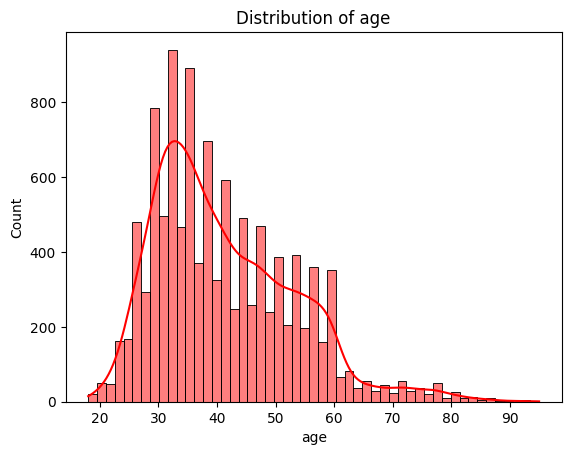

In [ ]:
# age
draw_plot_univariate_cont("age")

* It looks like the mean age is around 41, and the skewness is 0.82, slightly positively skewed, which means the median will be lesser than the mean.
* Using IQR to remove outliers might help making the distribution more normal, But one can perform log or square root Transformation which has proven to make the data more normal.
*There are are no missing values.
*Additionally, one can standardize or normalize the data at the cost of interpretability(target column).

Statistical summary of balance:

 count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 1528.538524

Median: 550.000000 

Skewness: 8.224619

Kurtosis: 126.861303

---------------------------------


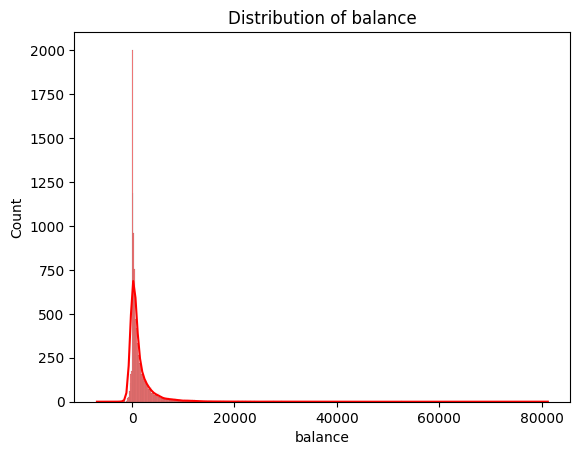

In [ ]:
draw_plot_univariate_cont("balance")

* It looks like the mean balance is around 1528units, and the skewness is 8.22, which means that the distribition is very highly positively skewed.
* But one can perform log or square root Transformation to make the distributionmore normal.
* There are are no missing values.
* Additionally, one can standardize or normalize the data at the cost of interpretability(target column)

Statistical summary of duration:

 count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64
---------------------------------
Missing values: 0.000000

Mean: 371.993818

Median: 255.000000 

Skewness: 2.143695

Kurtosis: 7.301282

---------------------------------


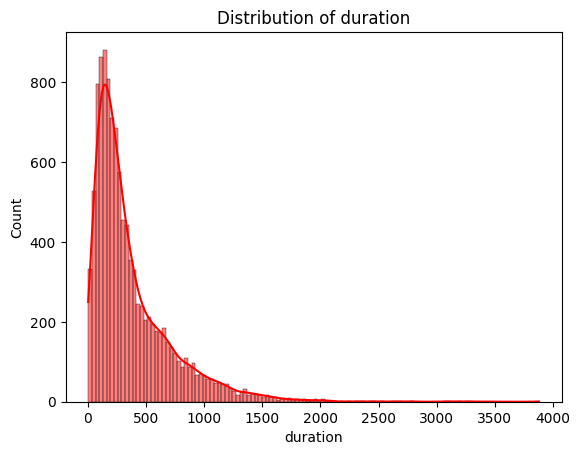

In [ ]:
draw_plot_univariate_cont("duration")


* It looks like the mean duration of the call is around 371 seconds, and the skewness is 2.14, which means that the distribition is v positively skewed.
* one can perform log , square root,or inverse Transformation to make the distributionmore normal.
* There are are no missing values.
* Additionally, one can standardize or normalize this continuos data at the cost of interpretability(target column)

In [ ]:
#plot for categorical columns
def draw_plot_univariate_cat(column,plot_description,fig_x=5,fig_y=3):
  print(f"Statistical summary of {column}:\n\n", df[column].describe(include='object'))
  print("---------------------------------")
  print("Missing values: %f\n" % df[column].isnull().sum())
  print("---------------------------------")
  print("Count")
  print("---------------------------------")
  print(df[column].value_counts())
  print("---------------------------------")
  plt.figure(figsize=(fig_x,fig_y))
  ax = sns.countplot(x=column, data=df,palette="rocket").set_title(plot_description)
  plt.show()

Statistical summary of job:

 count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
---------------------------------


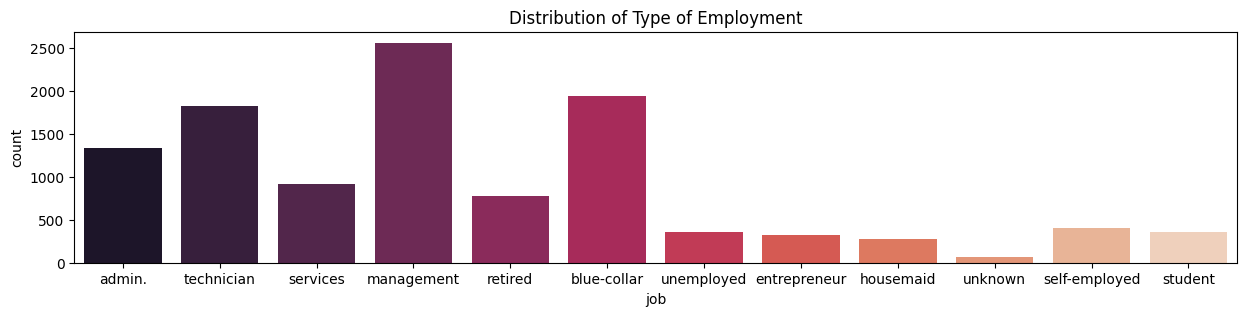

In [ ]:
draw_plot_univariate_cat("job","Distribution of Type of Employment",15,3)

* We have varied distribution of jobs under job column, with 12 differernt kinds of jobs, where management and blue collar jobs top the list.
* These have no order, hence this variable needs to be one hot encoded.

Statistical summary of marital:

 count       11162
unique          3
top       married
freq         6351
Name: marital, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
---------------------------------


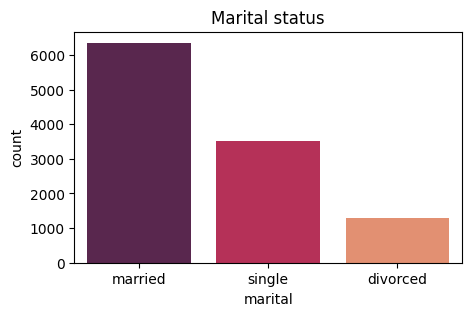

In [ ]:
draw_plot_univariate_cat("marital","Marital status")

* We have 6351 married people, 3518 single and 1293 divorced people. Further analysis on how this matters in opening a term deposit might help us add weightage for this variable while prediction.
* These have no order, hence this variable needs to be one hot encoded.


Statistical summary of education:

 count         11162
unique            4
top       secondary
freq           5476
Name: education, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
---------------------------------


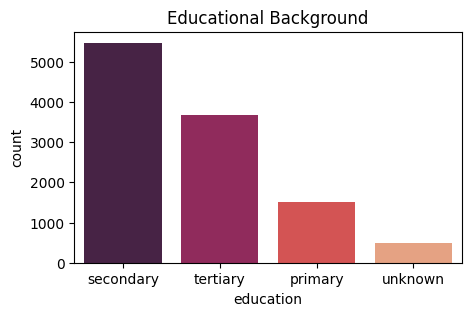

In [ ]:
draw_plot_univariate_cat("education","Educational Background",5,3)

* Close to half the people have secondary education. Because this is a ordinal variable, label encoding should be done.

Statistical summary of default:

 count     11162
unique        2
top          no
freq      10994
Name: default, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
no     10994
yes      168
Name: default, dtype: int64
---------------------------------


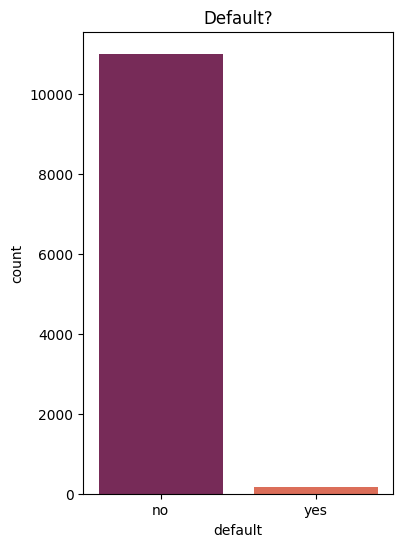

In [ ]:
draw_plot_univariate_cat("default","Default?",4,6)

In [ ]:
df["default"].value_counts()/(len(df))

no     0.984949
yes    0.015051
Name: default, dtype: float64

* This is an Highly imbalanced variable with close to 98% of the people with no defaults.
* while splitting the dataset, we gotta make sure that this variable is stratified considering how much correlated it is with the Target variable.
* Binary encoding is the way to go here

Statistical summary of housing:

 count     11162
unique        2
top          no
freq       5881
Name: housing, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
no     5881
yes    5281
Name: housing, dtype: int64
---------------------------------


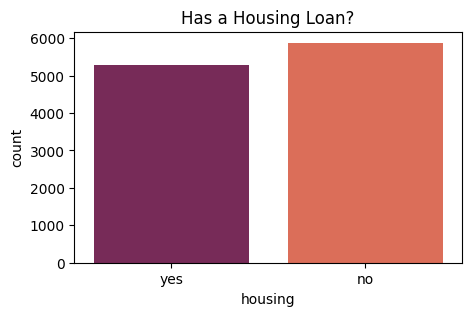

In [ ]:
draw_plot_univariate_cat("housing","Has a Housing Loan?")

* This variable is more or less balanced.
* Should be one hot encoded as there is no order in them

Statistical summary of loan:

 count     11162
unique        2
top          no
freq       9702
Name: loan, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
no     9702
yes    1460
Name: loan, dtype: int64
---------------------------------


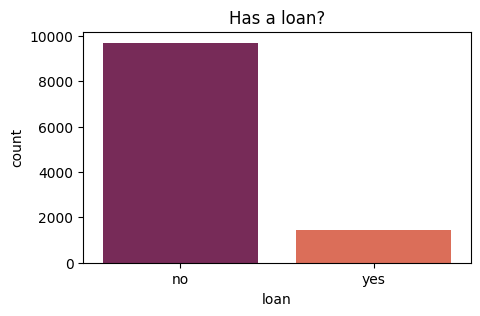

In [ ]:
draw_plot_univariate_cat("loan","Has a loan?")

* Most of the people do not have a loan, whereeas close to half of them have house loan.
* Similar to default variable, loan variable is also imbalanced.

Statistical summary of contact:

 count        11162
unique           3
top       cellular
freq          8042
Name: contact, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
---------------------------------


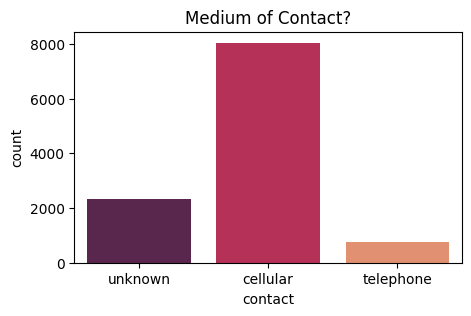

In [ ]:
draw_plot_univariate_cat("contact","Medium of Contact?")

* The customers were majory contacted through the cellphones
* is there an order in this? I personally do not think so. Hence we can go ahead with one hot encoding.

Statistical summary of day:

 count    11162.000000
mean        15.658036
std          8.420740
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max         31.000000
Name: day, dtype: float64
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64
---------------------------------


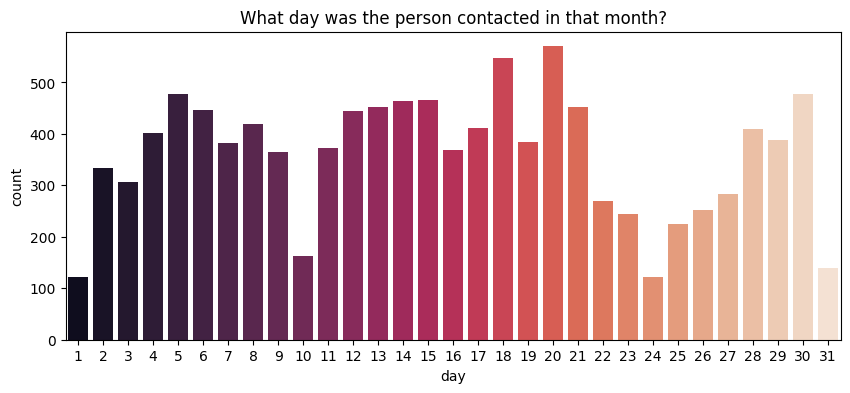

In [ ]:
draw_plot_univariate_cat("day","What day was the person contacted in that month?",10,4)

* Customers were contacted throught the month, with numbers slightly decreasing towards the end of the month.
* no encoding is required, as it is already in the form of label encoded variable

Statistical summary of month:

 count     11162
unique       12
top         may
freq       2824
Name: month, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
---------------------------------


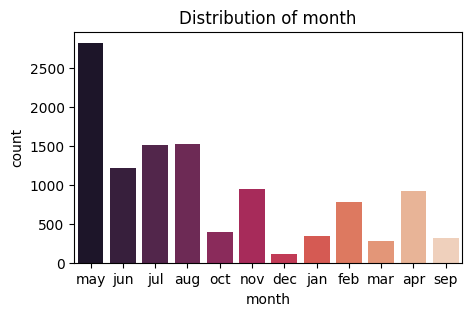

In [ ]:
draw_plot_univariate_cat("month","Distribution of month")

* For some reason, customers the number of calls made in May is significantly higher than any other month in the entire year.
* One hot encoding or Label encoding? I am going ahead with one hot encoding as i dont see an order in the months.

Statistical summary of poutcome:

 count       11162
unique          4
top       unknown
freq         8326
Name: poutcome, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
---------------------------------


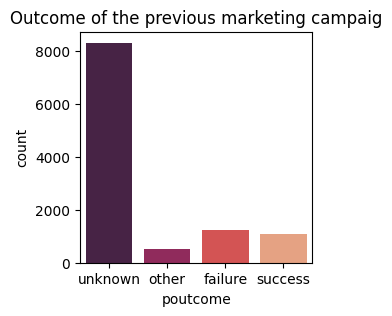

In [ ]:
draw_plot_univariate_cat("poutcome","Outcome of the previous marketing campaig",3,3)

* Most of the outcomes of the previous marketing campaign on the customers were unknown.
* But, equal possibility of failure and success is also present

Statistical summary of deposit:

 count     11162
unique        2
top          no
freq       5873
Name: deposit, dtype: object
---------------------------------
Missing values: 0.000000

---------------------------------
Count
---------------------------------
no     5873
yes    5289
Name: deposit, dtype: int64
---------------------------------


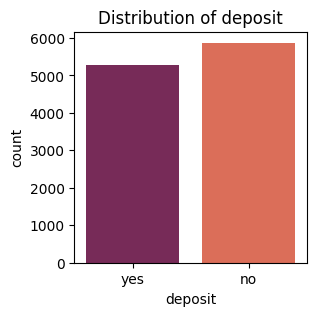

In [ ]:
draw_plot_univariate_cat("deposit","Distribution of deposit",3,3)

* Finally, we do have almost equal distribution of yes/no target variable "deposit" in our dataset. Hence we dont have to upsample or downsample. or even augment our data to balance the dataset.
* Like always, for target variables, i am going ahead with Label Encoding

#### Question 2

<Axes: >

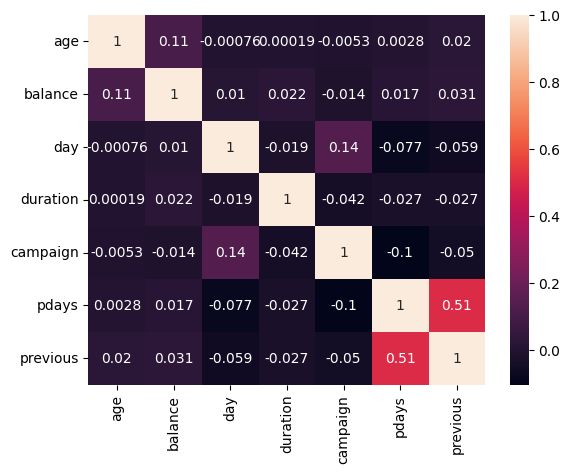

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* For only numerical variables, the correlation matrix does npt display of any direct correlation within each other apart from " pdays and previous".
* Because most of our featues are categorical, we would need further bivariate and multivariate analysis and categorical to numerical correlations calculated to understand the entire dataframe correlation.

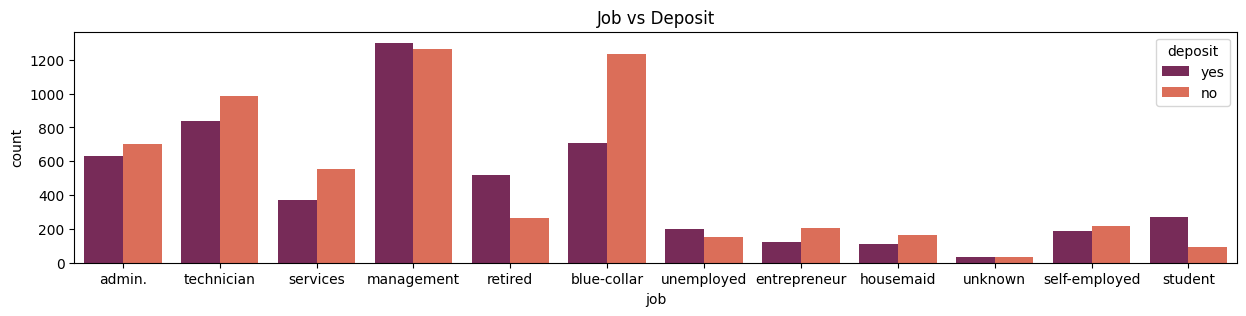

In [ ]:
plt.figure(figsize=(15,3))
sns.countplot(data =df,x= df["job"],hue="deposit",palette="rocket").set_title("Job vs Deposit")
plt.show()

In [ ]:
df.groupby(["job"]).deposit.value_counts().unstack()

deposit,no,yes
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


* Looks like customers in management have the highest number of conversions, and also at the same time highest number of declines, which makes sense as most of the calls would be made to them.
* unemployed and students have higher number of "YES" than "No".

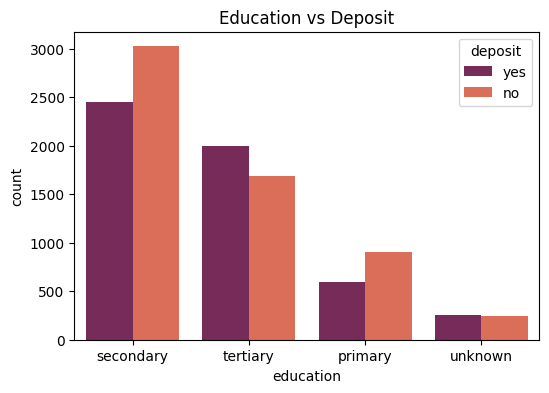

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data =df,x= df["education"],hue="deposit",palette="rocket").set_title("Education vs Deposit")
plt.show()

Customers with Tertiary education have higher number of "YES" than "No".

In [ ]:
df.groupby(["education"]).deposit.value_counts().unstack()

deposit,no,yes
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252


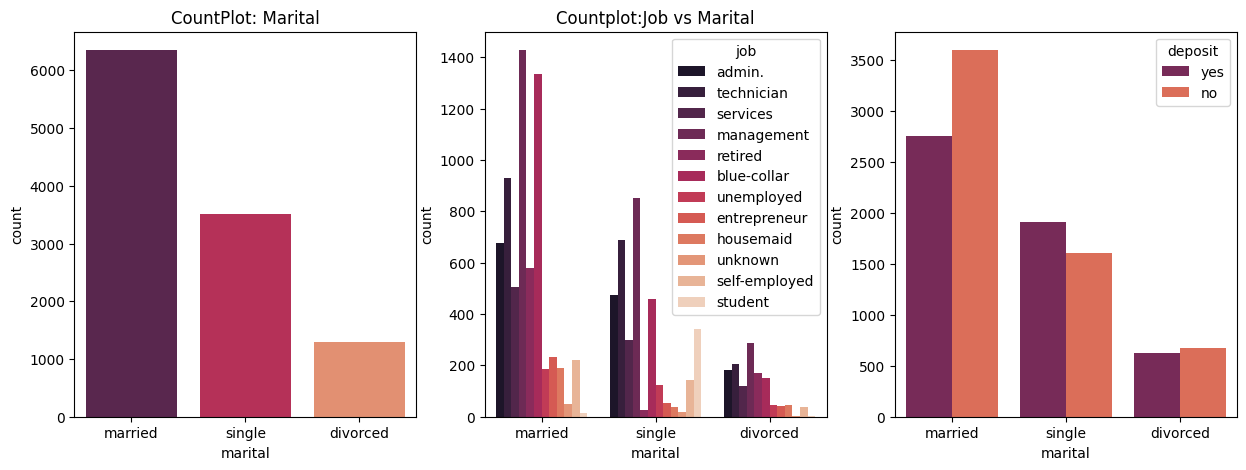

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.countplot(data =df,x=df["marital"],palette="rocket",ax=axs[0]).set_title("CountPlot: Marital")
sns.countplot(data =df,x=df["marital"],hue="job",palette="rocket",ax=axs[1]).set_title("Countplot:Job vs Marital")
sns.countplot(data =df,x=df["marital"],hue="deposit",palette= "rocket",ax=axs[2])
plt.subplots_adjust(hspace =0.7)

The distribution of jobs is almost the same across people who were married, single and divorced but the number of conversion in single and divorced in higher than married people.

In [ ]:
df.groupby(["default","job"]).deposit.value_counts().unstack()

deposit                    no     yes
default job                          
no      admin.          695.0   628.0
        blue-collar    1210.0   693.0
        entrepreneur    201.0   117.0
        housemaid       158.0   108.0
        management     1234.0  1293.0
        retired         258.0   515.0
        self-employed   212.0   185.0
        services        551.0   365.0
        student          90.0   269.0
        technician      964.0   830.0
        unemployed      149.0   200.0
        unknown          35.0    34.0
yes     admin.            8.0     3.0
        blue-collar      26.0    15.0
        entrepreneur      4.0     6.0
        housemaid         7.0     1.0
        management       31.0     8.0
        retired           4.0     1.0
        self-employed     6.0     2.0
        services          3.0     4.0
        student           1.0     NaN
        technician       19.0    10.0
        unemployed        6.0     2.0
        unknown           1.0     NaN

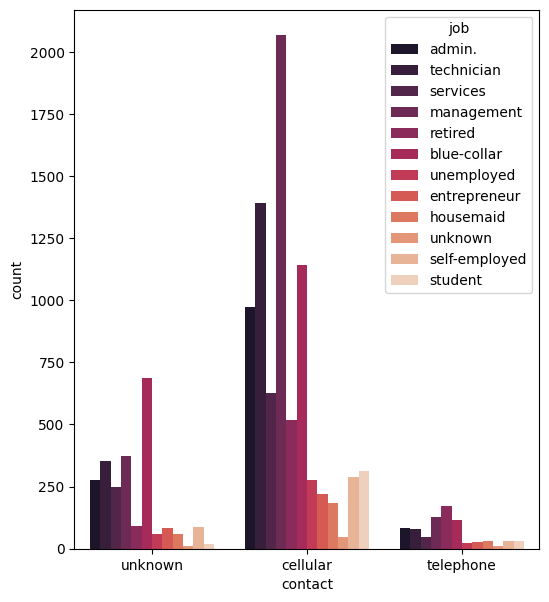

In [ ]:
plt.figure(figsize=(6,7))
g=sns.countplot(x=df["contact"],hue="job",data=df,palette="rocket")

<Axes: xlabel='age', ylabel='duration'>

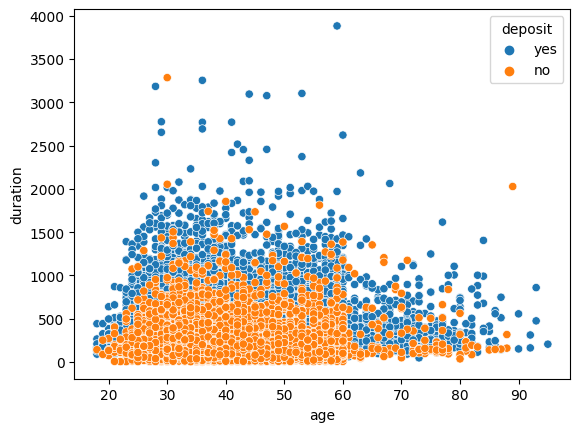

In [ ]:
sns.scatterplot(data=df, x="age", y="duration",hue= "deposit")

* Duration is one of the most important feature in the data, as it does make sense that the more time you talk to an agent, the more you would be inclined towards opening a term deposit.

* you can also see that the number of conversions is more for age category above 60.

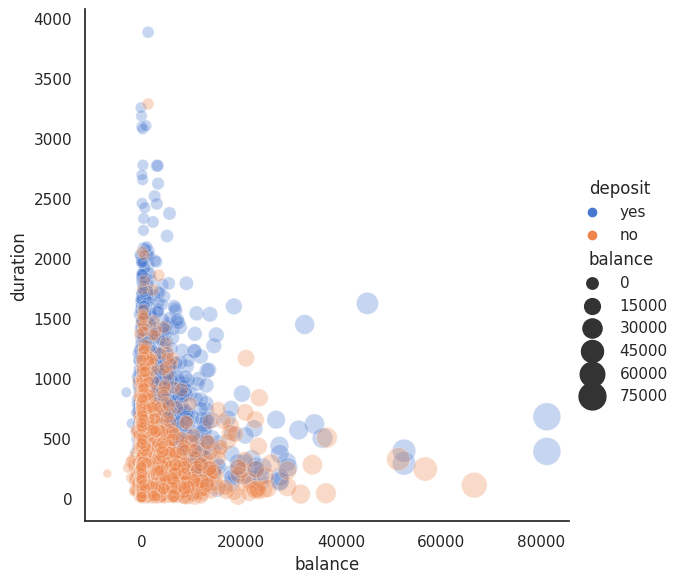

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="balance", y="duration", hue="deposit",size = "balance",
            sizes=(40, 400), alpha=.3, palette="muted",
            height=6, data=df)

* The ratio of Yes to NO as the balance increase is definitely more when it is in the range of 0-20000$.
* Higher the balance, more is the probability of opening a Term deposit.

[Text(0, 0, 'secondary'),
 Text(1, 0, 'tertiary'),
 Text(2, 0, 'primary'),
 Text(3, 0, 'unknown')]

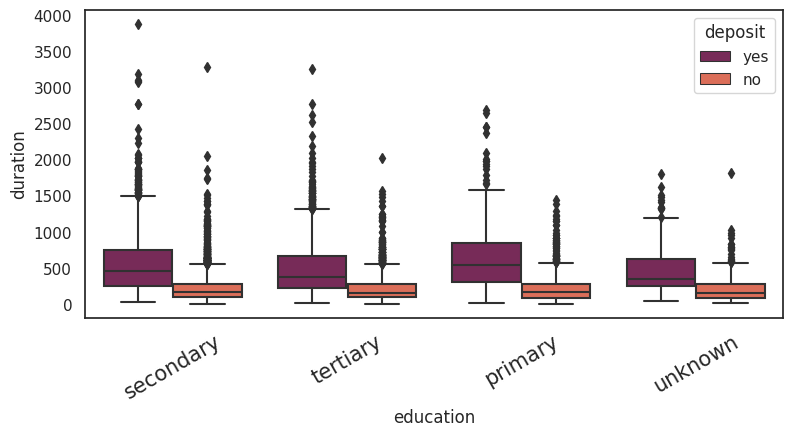

In [ ]:
plt.figure(figsize=(9,4))
g=sns.boxplot(x=df["education"],y=df["duration"],hue=df["deposit"],palette="rocket",data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=30,fontsize=15)

The duration of call in all the classes in education is considerably more when the customer ended up opening a term deposit.

<Axes: xlabel='duration', ylabel='Density'>

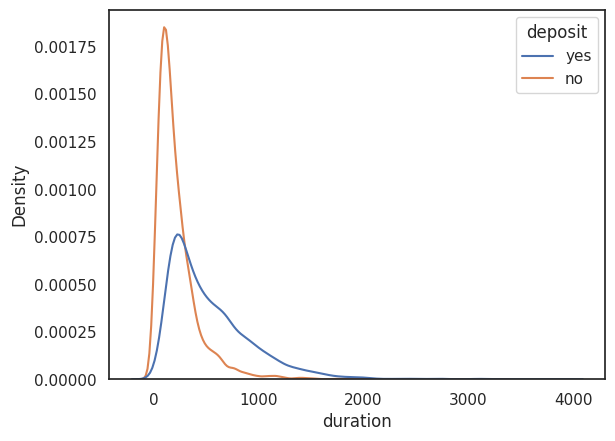

In [ ]:
sns.kdeplot(df,x = "duration",hue = "deposit")

Finally, once can see how much the duration of the call influences in deciding if the customer ends up opening a term deposit. Hence, we have to make sure the test and train data is split equally to represenent the same distribution.